
<h1><center>This Notebook Contains 15 different types of Visualization using Python as shown in following Table of Contents.</center></h1>

<div class="alert alert-block alert-info" style="margin-top: 10px">

1. [<h3>Annotated Line Plot using Matplotlib</h3>](#1)
    a) [Data Preprocessing](#1_a)
    b) [Data Visualization](#1_b)
2. [<h3>Annotated Scatter plot using Matplotlib</h3>](#2)
    a) [Data Preprocessing](#2_a)
    b) [Data Visualization](#2_b)
3. [<h3>Regression Plot using Seaborn</h3>](#3)
    a) [Data Preprocessing](#3_a)
    b) [Data Visualization](#3_b)
4. [<h3>Multiple Plots (Box, Line) using Matplotlib</h3>](#4) 
    a) [Data Preprocessing](#4_a)
    b) [Data Visualization](#4_b)
5. [<h3>Bubble Plot using Matplotlib</h3>](#5)
    a) [Data Preprocessing](#5_a)
    b) [Data Visualization](#5_b)
6. [<h3>Area Plot using Matplotlib</h3>](#6) 
    a) [Data Preprocessing](#6_a)
    b) [Data Visualization](#6_b)
7. [<h3>Customized Histogram plot using Matplotlib</h3>](#7)
    a) [Data Preprocessing](#7_a)
    b) [Data Visualization](#7_b)
8. [<h3>Customized Bar Chart Using Matplotlib</h3>](#8)
    a) [Data Preprocessing](#8_a)
    b) [Data Visualization](#8_b)
9. [<h3>Annotated Bar Chart using Matplotlib</h3>](#9) 
    a) [Data Preprocessing](#9_a)
    b) [Data Visualization](#9_b)
10. [<h3>Customized Pie Chart using Matplotlib</h3>](#10) 
    a) [Data Preprocessing](#10_a)
    b) [Data Visualization](#10_b)
11. [<h3>Customizing Waffle Chart Using Matplotlib</h3>](#11) 
    a) [Data Preprocessing](#11_a)
    b) [Data Visualization](#11_b)
12. [<h3>Word Cloud Visualization</h3>](#12)
    a) [Data Preprocessing](#12_a)
    b) [Data Visualization](#12_b)
13. [<h3>Interactive 3d-Scatter Plot using Plotly</h3>](#13) 
    a) [Data Preprocessing](#13_a)
    b) [Data Visualization](#13_b)
14. [<h3>Choropleth Map using Folium</h3>](#14)
    a) [Data Preprocessing](#14_a)
    b) [Data Visualization](#14_b)
15. [<h3>Interactive Geospatial Map using Folium</h3>](#15)
    a) [Data Preprocessing](#15_a)
    b) [Data Visualization](#15_b)

</div>
<hr>

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd

# Matplotlib is the whole package; matplotlib.pyplot is a module in matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt


import folium
from folium import plugins # For interactive geospatial visualizations
from PIL import Image # converting images into arrays
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.patches as mpatches # needed for waffle Charts
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go

init_notebook_mode (connected = True)
from IPython.display import display

<h1> <center>Annotated Line Plot using Matplotlib</center> </h1><a id="1"></a>

<h3><center> Data Preprocessing </center></h3><a id="1_a"></a>

###### Loading Dataset

In [2]:
df_can = pd.read_excel('Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


###### Cleaning Data

In [3]:
# remove unnecessary columns
df_can.drop(['AREA','REG','DEV','Type','Coverage','AreaName','RegName','DevName'], axis=1, inplace=True)

# rename columns
df_can.rename(columns={'OdName':'Country'}, inplace=True)

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

df_can.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,1,0,0,0,0,0,1,2,2,3,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,80,67,71,69,63,44,69,132,242,434,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,1,1,0,0,0,0,1,1,15


###### Extracting Data for Haiti

In [4]:
years = list(range(1980, 2014))
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: int64

<h3><center> Data Visualization </center></h3><a id="1_b"></a>

In [5]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
mpl.style.use(['ggplot']) 

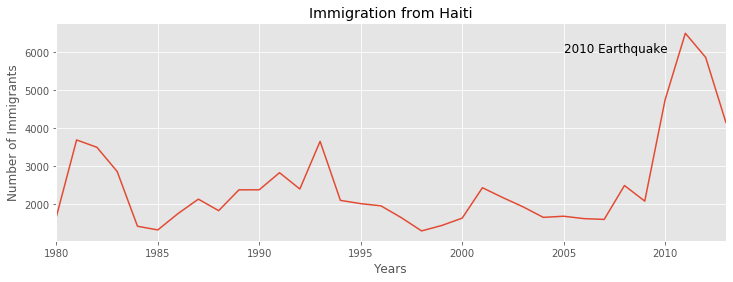

In [6]:
plt.figure(figsize=(12, 4))
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
plt.text(2005, 6000, '2010 Earthquake',fontsize=12) 

plt.show() 

<h1> <center>Annotated Scatter Plots using Matplotlib</center> </h1><a id="2"></a>

<h3><center> Data Preprocessing </center></h3><a id="2_a"></a>

###### Loading Dataset

In [7]:
df_can = pd.read_excel('Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


###### Cleaning Data

In [8]:
# total population per year
years = list(range(1980, 2014))
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


###### Fitting line to scatter plot

In [9]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

<h3><center> Data Visualization </center></h3><a id="2_b"></a>

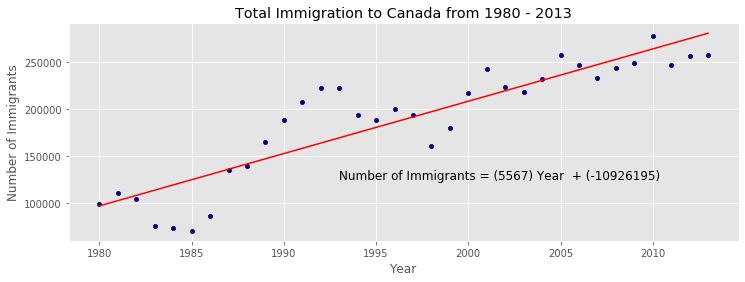

'No. Immigrants = 5567 * Year + -10926195'

In [10]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(12, 4), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('Number of Immigrants = ({0:.0f}) Year  + ({1:.0f})'.format(fit[0], fit[1]), xy=(1993, 125000),fontsize=12)

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

<h1> <center>Regression Plot using Seaborn</center> </h1><a id="3"></a>

<h3><center> Data Preprocessing </center></h3><a id="3_a"></a>

###### Loading Data

In [11]:
df_can = pd.read_excel('Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


###### Create a new dataframe that stores that total number of landed immigrants to Canada per year from 1980 to 2013.

In [12]:
# for sake of consistency, let's make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# we can use the sum() method to get the total population per year
years = list(map(str, range(1980, 2014)))
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


<h3><center> Data Visualization </center></h3><a id="3_b"></a>

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

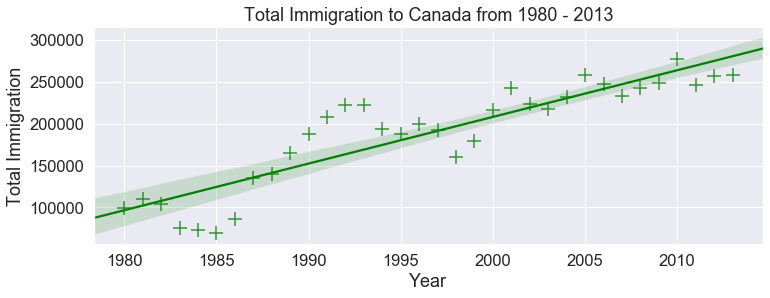

In [13]:
plt.figure(figsize=(12, 4))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

<h1> <center>Multiple Plots (Box, Line) using Matplotlib</center> </h1><a id="4"></a>

<h3><center> Data Preprocessing </center></h3><a id="4_a"></a>

###### Loading Dataset

In [14]:
df_can = pd.read_excel('Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


###### Cleaning Data

In [15]:
# remove unnecessary columns
df_can.drop(['AREA','REG','DEV','Type','Coverage','AreaName','RegName','DevName'], axis=1, inplace=True)

# rename columns
df_can.rename(columns={'OdName':'Country'}, inplace=True)

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

df_can.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,1,0,0,0,0,0,1,2,2,3,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,80,67,71,69,63,44,69,132,242,434,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,1,1,0,0,0,0,1,1,15


###### Extracting Data for China and India

In [16]:
years = list(range(1980, 2014))
df_CI = df_can.loc[(['China', 'India']), years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [17]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


<h3><center> Data Visualization </center></h3><a id="4_b"></a>

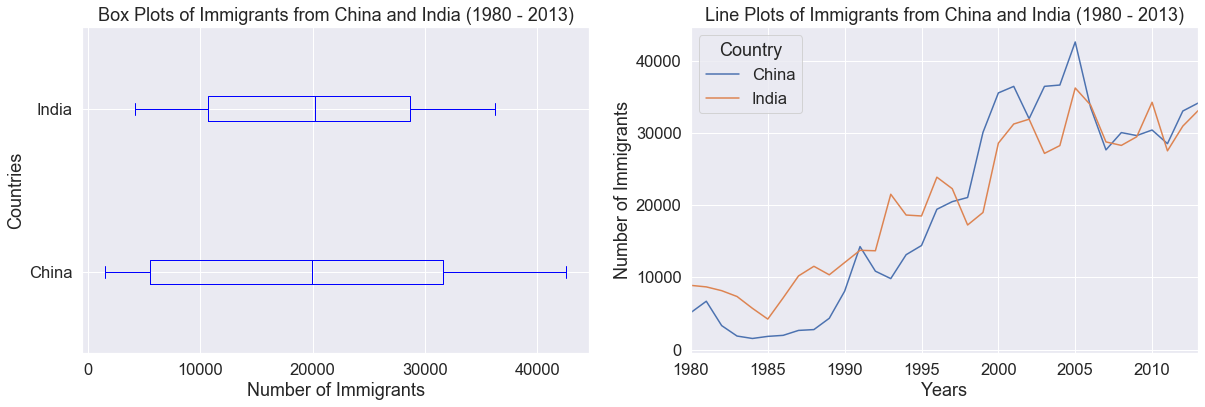

In [18]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

<h1> <center>Bubble Plot using Matplotlib</center> </h1><a id="5"></a>

<h3><center> Data Preprocessing </center></h3><a id="5_a"></a>

###### Loading Dataset

In [19]:
df_can = pd.read_excel('Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


###### Cleaning Data

In [20]:
# remove unnecessary columns
df_can.drop(['AREA','REG','DEV','Type','Coverage','AreaName','RegName','DevName'], axis=1, inplace=True)

# rename columns
df_can.rename(columns={'OdName':'Country'}, inplace=True)

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# total population per year
years = list(range(1980, 2014))
df_can_t = df_can[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


###### Normalizing the data pertaining to china and india

In [21]:
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

<h3><center> Data Visualization </center></h3><a id="5_b"></a>

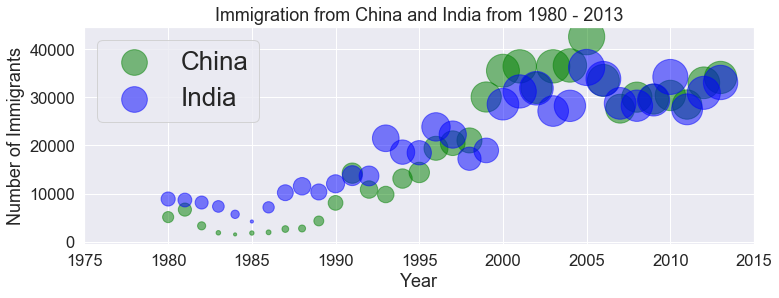

In [22]:
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(12, 4),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_china * 1300 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 1300 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

<h1> <center>Area plot using Matplotlib</center> </h1><a id="6"></a>

<h3><center> Data Preprocessing </center></h3><a id="6_a"></a>

###### Loading Data

In [23]:
df_can = pd.read_excel('Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


###### Create a new dataframe that stores that total number of landed immigrants to Canada per year from 1980 to 2013.

In [24]:
# remove unnecessary columns
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# rename columns
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [25]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
years = list(map(str,range(1980, 2014)))
df_top5 = df_top5[years].transpose() 

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


<h3><center> Data Visualization </center></h3><a id="6_b"></a>

In [26]:
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
mpl.style.use(['ggplot']) 

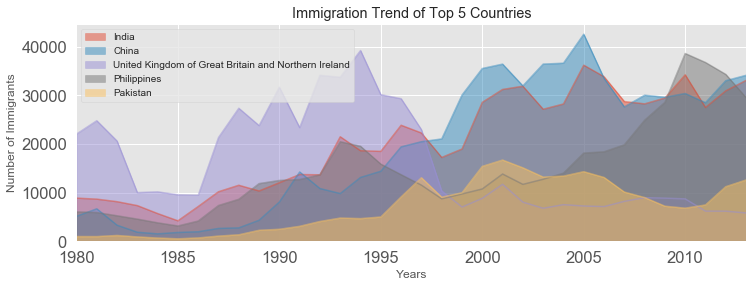

In [27]:
df_top5.plot(kind='area', 
             stacked=False,
             figsize=(12, 4), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.legend(fontsize=10)

plt.show()

<h1> <center>Customized Histogram using Matplotlib</center> </h1><a id="7"></a>

<h3><center> Data Preprocessing </center></h3><a id="7_a"></a>

###### Loading Dataset

In [28]:
df_can = pd.read_excel('Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


###### Cleaning Data

In [29]:
# remove unnecessary columns
df_can.drop(['AREA','REG','DEV','Type','Coverage','AreaName','RegName','DevName'], axis=1, inplace=True)

# rename columns
df_can.rename(columns={'OdName':'Country'}, inplace=True)

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

df_can.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,1,0,0,0,0,0,1,2,2,3,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,80,67,71,69,63,44,69,132,242,434,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,1,1,0,0,0,0,1,1,15


###### Extracting Data for Denmark, Norway, Sweden

In [30]:
years = list(range(1980, 2014))
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


<h3><center> Data Visualization </center></h3><a id="7_b"></a>

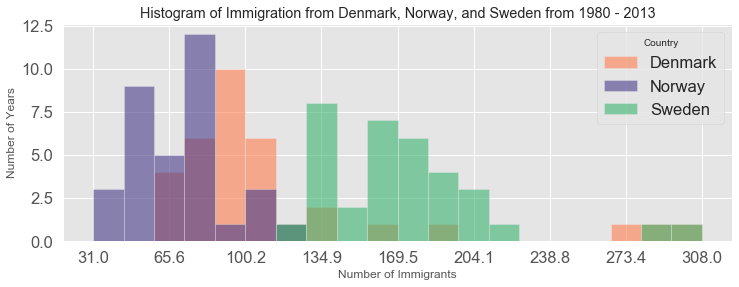

In [31]:
mpl.style.use(['ggplot']) 

# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 8)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(12,4),
          bins=20,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

<h1> <center>Customized Bar Chart using Matplotlib</center> </h1><a id="8"></a>

<h3><center> Data Preprocessing </center></h3><a id="8_a"></a>

###### Loading Data

In [32]:
df = pd.read_csv('Data_Science_Topics_Survey.csv')
df.head(3)

,Timestamp,What's your level of interest for the following areas of Data Science? [Data Visualization],What's your level of interest for the following areas of Data Science? [Machine Learning],What's your level of interest for the following areas of Data Science? [Data Analysis / Statistics],What's your level of interest for the following areas of Data Science? [Big Data (Spark / Hadoop)],What's your level of interest for the following areas of Data Science? [Data Journalism],What's your level of interest for the following areas of Data Science? [Deep Learning]
0,2017/10/17 1:11:52 PM MDT,Very interested,Very interested,Somewhat interested,Not interested,Somewhat interested,Somewhat interested
1,2017/10/17 2:26:07 PM MDT,Very interested,Very interested,Very interested,Somewhat interested,Not interested,Very interested
2,2017/10/17 2:37:08 PM MDT,Not interested,Very interested,Somewhat interested,Very interested,Not interested,Very interested


###### Dropping the Timestamp column, and changing the column names

In [33]:
df.drop(columns='Timestamp', axis = 0, inplace = True)
df.rename(columns=lambda x: x.split('[')[-1][:-1], inplace=True)
df.head()

,Data Visualization,Machine Learning,Data Analysis / Statistics,Big Data (Spark / Hadoop),Data Journalism,Deep Learning
0,Very interested,Very interested,Somewhat interested,Not interested,Somewhat interested,Somewhat interested
1,Very interested,Very interested,Very interested,Somewhat interested,Not interested,Very interested
2,Not interested,Very interested,Somewhat interested,Very interested,Not interested,Very interested
3,Very interested,Very interested,Very interested,Very interested,Somewhat interested,Very interested
4,Somewhat interested,Very interested,Very interested,Very interested,Not interested,Somewhat interested


###### Transposing data

In [34]:
result = df.transpose()
result.head()

,0,1,2,3,4,5,6,7,8,9,...,2223,2224,2225,2226,2227,2228,2229,2230,2231,2232
Data Visualization,Very interested,Very interested,Not interested,Very interested,Somewhat interested,Very interested,Somewhat interested,Very interested,Somewhat interested,Very interested,...,Very interested,Very interested,Very interested,Somewhat interested,Very interested,Very interested,Very interested,Very interested,Very interested,Somewhat interested
Machine Learning,Very interested,Very interested,Very interested,Very interested,Very interested,Very interested,Very interested,Very interested,Very interested,Very interested,...,Somewhat interested,Somewhat interested,Very interested,Very interested,Very interested,Very interested,Very interested,Very interested,Somewhat interested,Somewhat interested
Data Analysis / Statistics,Somewhat interested,Very interested,Somewhat interested,Very interested,Very interested,Very interested,Somewhat interested,Very interested,Very interested,Very interested,...,Very interested,Very interested,Very interested,Very interested,Very interested,Very interested,Very interested,Very interested,Somewhat interested,Somewhat interested
Big Data (Spark / Hadoop),Not interested,Somewhat interested,Very interested,Very interested,Very interested,Very interested,Not interested,Somewhat interested,Very interested,Very interested,...,Very interested,Somewhat interested,Somewhat interested,Very interested,Very interested,Very interested,Very interested,Very interested,Somewhat interested,Somewhat interested
Data Journalism,Somewhat interested,Not interested,Not interested,Somewhat interested,Not interested,Very interested,Not interested,Somewhat interested,Somewhat interested,Somewhat interested,...,Very interested,Somewhat interested,Very interested,Somewhat interested,Not interested,Very interested,Very interested,Not interested,Somewhat interested,Somewhat interested


###### Calculating relevant frequencies

In [35]:
result['Not interested'] = np.sum(result == 'Not interested', axis = 1)
result['Somewhat interested'] = np.sum(result == 'Somewhat interested', axis = 1)
result['Very interested'] = np.sum(result == 'Very interested', axis = 1)
result.drop(result.columns[:-3],axis=1,inplace=True)
result.head()

D:\anaconda\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



,Not interested,Somewhat interested,Very interested
Data Visualization,102,734,1340
Machine Learning,74,477,1629
Data Analysis / Statistics,60,444,1688
Big Data (Spark / Hadoop),127,729,1332
Data Journalism,610,1081,429


In [36]:
result = result.sort_index(axis=1, ascending=False)
result = result.sort_values('Very interested', ascending=False)
result = result / len(df) * 100
result.round(2)

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


<h3><center>Data Visualization </center></h3> <a id="8_b"></a> 

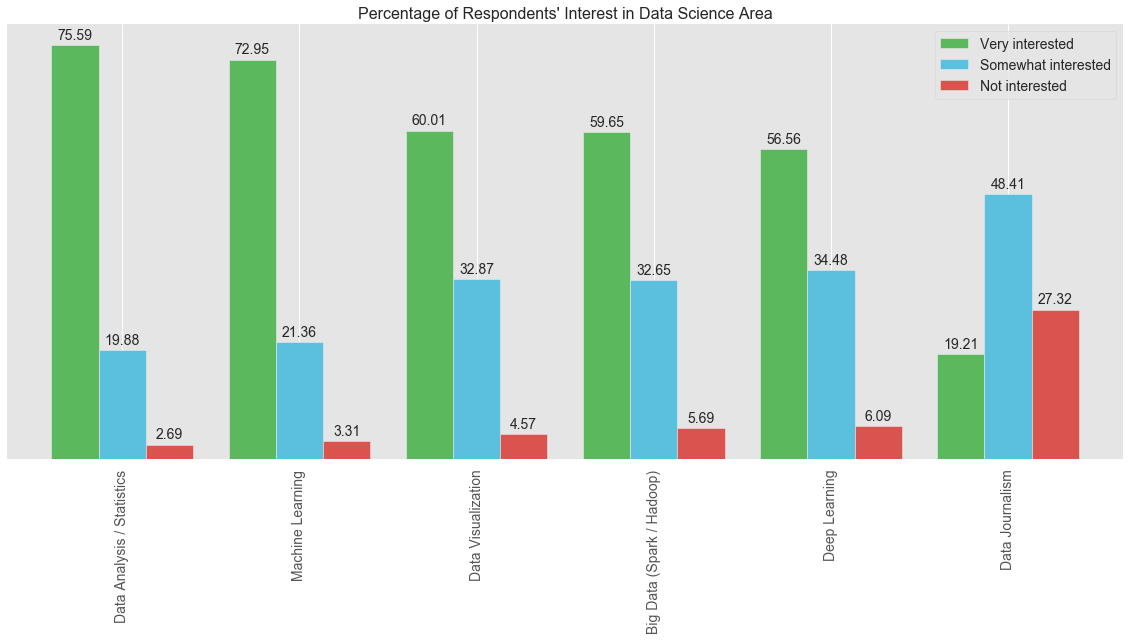

In [37]:
ax = result.plot(kind='bar', 
            figsize=(20, 8), 
            width=0.8, 
            color=['#5cb85c', '#5bc0de', '#d9534f'],
           )

ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.tick_params(labelsize=14)
ax.legend(fontsize=14)
ax.set_title("Percentage of Respondents' Interest in Data Science Area", fontsize=16)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )
plt.show()

<h1> <center>Annotated Bar Chart using Matplotlib</center> </h1><a id="9"></a>

<h3><center> Data Preprocessing </center></h3><a id="9_a"></a>

###### Loading Dataset

In [38]:
df_can = pd.read_excel('Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


###### Cleaning Data

In [39]:
# remove unnecessary columns
df_can.drop(['AREA','REG','DEV','Type','Coverage','AreaName','RegName','DevName'], axis=1, inplace=True)

# rename columns
df_can.rename(columns={'OdName':'Country'}, inplace=True)

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

df_can.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,1,0,0,0,0,0,1,2,2,3,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,80,67,71,69,63,44,69,132,242,434,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,1,1,0,0,0,0,1,1,15


###### Extracting Data for Iceland

In [40]:
years = list(range(1980, 2014))
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: int64

<h3><center> Data Visualization </center></h3><a id="9_b"></a>

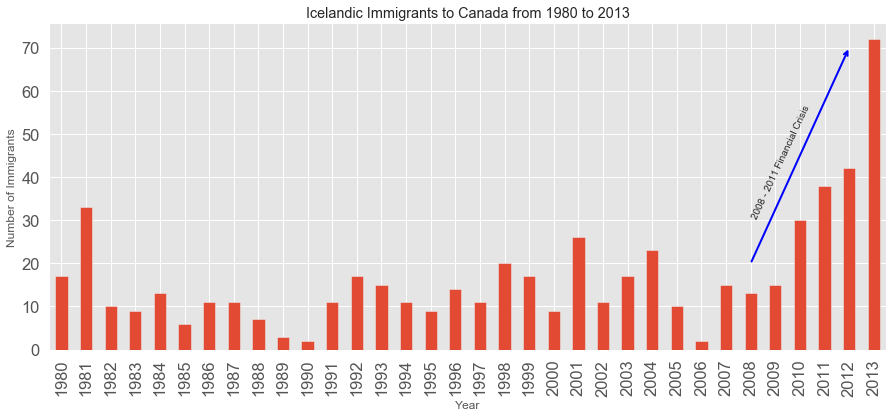

In [41]:
mpl.style.use(['ggplot']) 
df_iceland.plot(kind='bar', figsize=(15, 6), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=65,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

<h1> <center>Customized Pie Chart using Matplotlib</center> </h1><a id="10"></a>

<h3><center> Data Preprocessing </center></h3><a id="10_a"></a>

###### Loading Dataset

In [42]:
df_can = pd.read_excel('Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


###### Cleaning Data

In [43]:
# remove unnecessary columns
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# rename columns
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


###### Grouping data for pie chart

In [44]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


<h3><center> Data Visualization </center></h3><a id="10_b"></a>

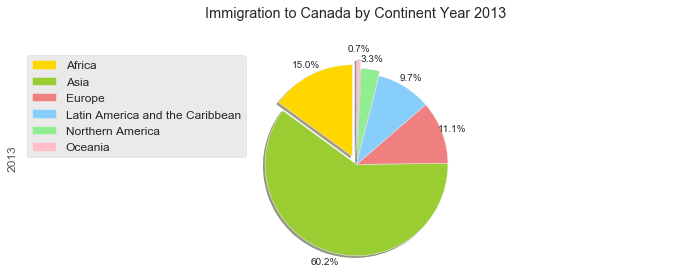

In [45]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.05, 0.15] # ratio for each continent with which to offset each wedge.

df_continents['2013'].plot(kind='pie',
                            figsize=(12, 4),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                           # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            pctdistance=1.12,    
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent Year 2013', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left',fontsize=12) 

plt.show()


<h1> <center>Customized Waffle Chart using Matplotlib</center> </h1><a id="11"></a>
<center>A waffle chart is an interesting visualization that is normally created to display progress toward goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard.</center>

<h3><center> Data Preprocessing </center></h3><a id="11_a"></a>

###### Loading Data

In [46]:
df_can = pd.read_excel('Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


###### Cleaning Data

In [47]:
# remove unnecessary columns
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# rename columns
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [48]:
# let's create a new dataframe for these three countries 
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [49]:
categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories
print(categories)
print("")
print("")
print("")
print(values)

['Denmark' 'Norway' 'Sweden']



Country
Denmark    3901
Norway     2327
Sweden     5866
Name: Total, dtype: int64


<h3><center> Data Visualization </center></h3><a id="11_b"></a>

**Step 1.** The first step into creating a waffle chart is determing the proportion of each category with respect to the total.

In [50]:
# compute the proportion of each category with respect to the total
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


**Step 2.** The second step is defining the overall size of the `waffle` chart.

In [51]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


**Step 3.** The third step is using the proportion of each category to determe it respective number of tiles

In [52]:
# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


Based on the calculated proportions, Denmark will occupy 129 tiles of the `waffle` chart, Norway will occupy 77 tiles, and Sweden will occupy 194 tiles.

**Step 4.** The fourth step is creating a matrix that resembles the `waffle` chart and populating it.

In [53]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


Let's take a peek at how the matrix looks like.

In [54]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

As expected, the matrix consists of three categories and the total number of each category's instances matches the total number of tiles allocated to each category.

**Step 5.** Map the `waffle` chart matrix into a visual.

<Figure size 432x288 with 0 Axes>

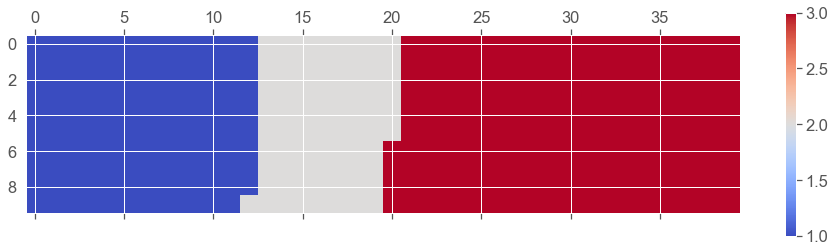

In [55]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

**Step 6.** Prettify the chart.

([], <a list of 0 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

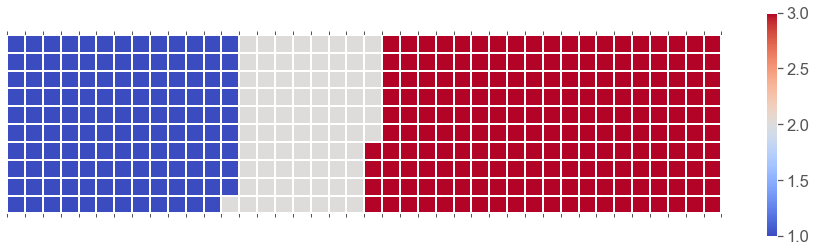

In [56]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

**Step 7.** Create a legend and add it to chart.

<Figure size 432x288 with 0 Axes>

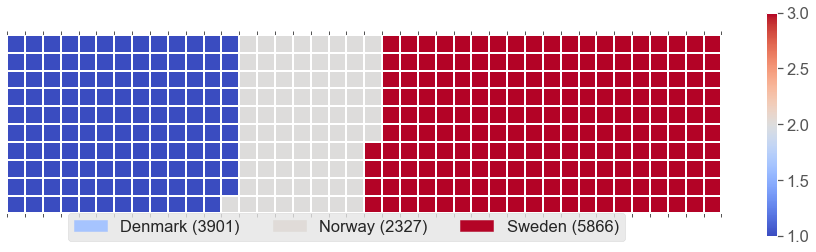

In [57]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

<h1> <center>Word Cloud Visualization</center> </h1><a id="12"></a>
<center>`Word` clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.</center>

<h3><center> Data Preprocessing </center></h3><a id="12_a"></a>

###### Load Text Data

In [58]:
alice_novel = open('alice_novel.txt', 'r').read()

We use the function *set* to remove any redundant stopwords.

In [59]:
stopwords = set(STOPWORDS)

<h3><center> Data Visualization </center></h3><a id="12_b"></a>

Create a word cloud object and generate a word cloud. For simplicity, let's generate a word cloud using only the first 2000 words in the novel.

In [60]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

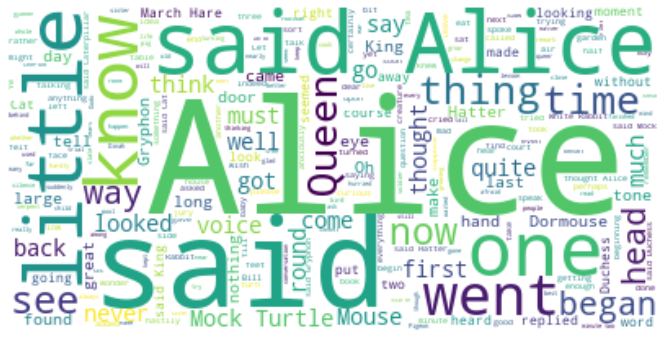

In [61]:
fig = plt.figure()
fig.set_figwidth(12) # set width
fig.set_figheight(6) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Interesting! So in the first 2000 words in the novel, the most common words are **Alice**, **said**, **little**, **Queen**, and so on. However,  **said** isn't really an informative word. So let's add it to our stopwords and re-generate the cloud.

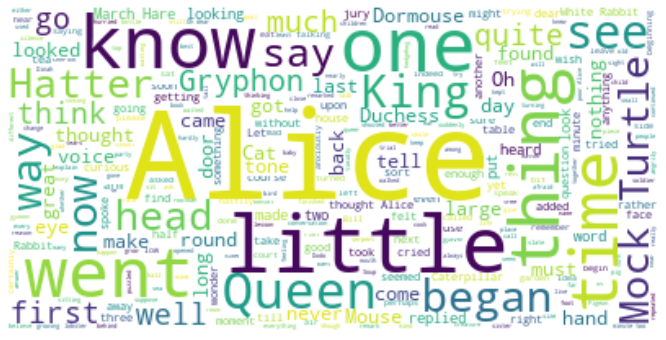

In [62]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(12) # set width
fig.set_figheight(6) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

This looks really interesting! Another cool thing that we can implement with the `word_cloud` package is superimposing the words onto a mask of any shape. Let's use a mask of Alice and her rabbit.

In [63]:
# save mask to alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))

Let's take a look at how the mask looks like.

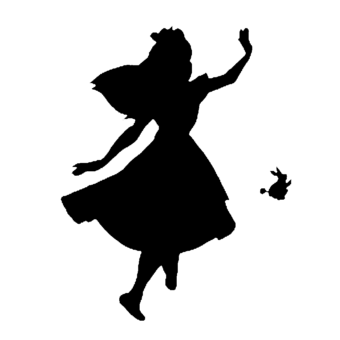

In [64]:
fig = plt.figure()
fig.set_figwidth(12) # set width
fig.set_figheight(6) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Shaping the `word` cloud according to the mask is straightforward using `word_cloud` package. For simplicity, we will continue using the first 2000 words in the novel.

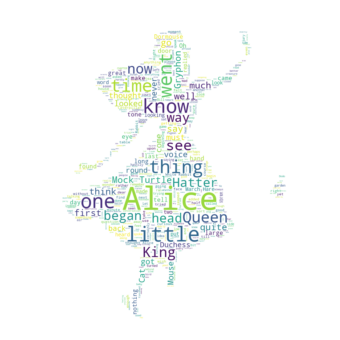

In [65]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(12) # set width
fig.set_figheight(6) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

<h1> <center>Interactive 3D-Scatter Plot using Plotly</center> </h1><a id="13"></a>

<h3><center> Data Preprocessing </center></h3><a id="13_a"></a>

###### Loading Data

In [66]:
df = pd.read_excel('Mining Data.xlsx')
df.head()

,X,Y,Z,Grade,Tonnage
0,0,1,20,0.077066,1000
1,1,1,15,1.375353,1000
2,1,1,16,0.913002,1000
3,1,1,17,0.606289,1000
4,1,1,18,0.208912,1000


<h3><center> Data Visualization </center></h3><a id="13_b"></a>

In [67]:
space1 = df.loc[:,['X','Y','Z','Grade']]        
plot_scatter = go.Scatter3d(
    x=space1['X'],
    y=space1['Y'],
    z=space1['Z'],
    mode='markers',
    marker=dict(
        size=5,
        cmax=4,
        cmin=0,
        color=space1['Grade'], 
        colorbar=dict(title='matter'), 
        colorscale='matter'
    )
)
plotData = [plot_scatter]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)  
fig = go.Figure(data=plotData, layout=layout)
iplot(fig,filename='Interactive_3dScatter.html')

<h1> <center>Choropleth Map using Folium</center> </h1><a id="14"></a>

<h3><center> Data Preprocessing </center></h3><a id="14_a"></a>

###### Loading Data

In [68]:
df_can = pd.read_excel('Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


###### Cleaning Data

In [69]:
# remove unnecessary columns
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# rename columns
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# add total column
df_can['Total'] = df_can.sum(axis=1)

df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


<h3><center>Data Visualization </center></h3> <a id="14_b"></a> 

In [70]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

###### The following work is done to let Folium determine the scale.

In [71]:
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_can['Total'].min(),
                              df_can['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # last value of the list must be greater than the maximum immigration


In [72]:
# Create the map
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
)

D:\anaconda\lib\site-packages\folium\folium.py:415: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [73]:
display(world_map)

###### Choropleth Map is saved with name of world_choropleth_map.html

In [74]:
# Saving map
world_map.save("world_choropleth_map.html")

<h1> <center>Interactive GeoSpatial Visualization Using Folium</center> </h1><a id="15"></a>

<h3><center> Data Preprocessing </center></h3><a id="15_a"></a>

###### Loading Data

In [75]:
df = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [76]:
df_longitude, df_latitude, df_crime = df.X, df.Y, df.Category

<h3><center> Data Visualization </center></h3><a id="15_b"></a>

In [77]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

# let's start again with a clean copy of the map of San Francisco
san_fransisco_geospatial = folium.Map(location = [latitude, longitude], zoom_start = 12)

In [78]:
# instantiate a marker cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(san_fransisco_geospatial)

# loop through the dataframe and add each data point to the marker cluster
for lng, lat, label, in zip(df_longitude, df_latitude, df_crime):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

### Cannot display because the size of file is too large to display. 
The reason is that this map is highly interactive.

In [79]:
#display(san_fransisco_geospatial)

###### Saves map to san_fransisco_geospatial.html

In [80]:
# Save map
san_fransisco_geospatial.save("san_fransisco_geospatial.html")